In [23]:
import numpy as np
import apfelpy as ap
import matplotlib.pyplot as plt
import MatplotlibSettings

In [24]:
# x-space grid
g = ap.Grid([ap.SubGrid(100,1e-5,3), ap.SubGrid(60,1e-1,3), ap.SubGrid(50,6e-1,3), ap.SubGrid(50,8e-1,3)])

# Initial scale
mu0 = 1

# Vectors of masses and thresholds
Thresholds = [0, 0, 0, np.sqrt(2), 4.5, 175]

# Perturbative order
PerturbativeOrder = 2

# Running coupling
a = ap.AlphaQCD(0.35, np.sqrt(2), Thresholds, PerturbativeOrder)
Alphas = ap.TabulateObject(a, 100, 0.9, 1001, 3)

# Initialize QCD evolution objects
DglapObj   = ap.initializers.InitializeDglapObjectsQCD(g, Thresholds)

# Construct the DGLAP objects
EvolvedPDFs = ap.builders.BuildDglap(DglapObj, ap.utilities.LHToyPDFs, mu0, PerturbativeOrder, Alphas.Evaluate)

# Tabulate PDFs
TabulatedPDFs = ap.TabulateObjectSetD(EvolvedPDFs, 50, 1, 1000, 3)

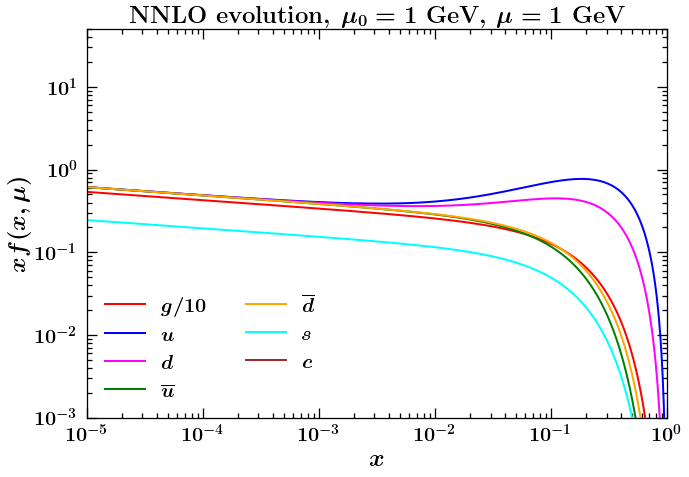

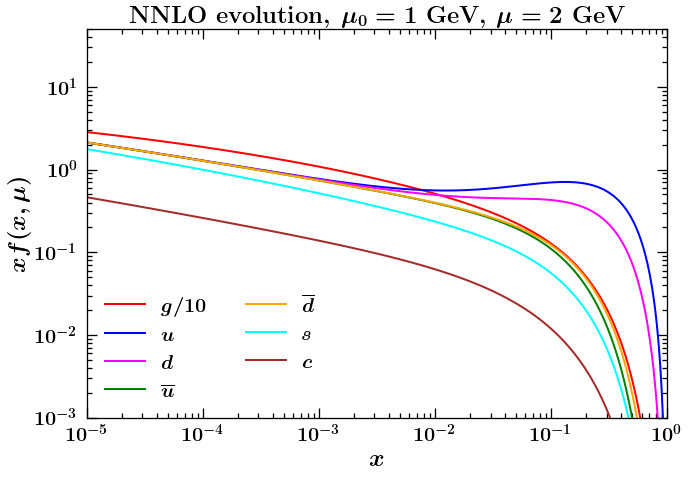

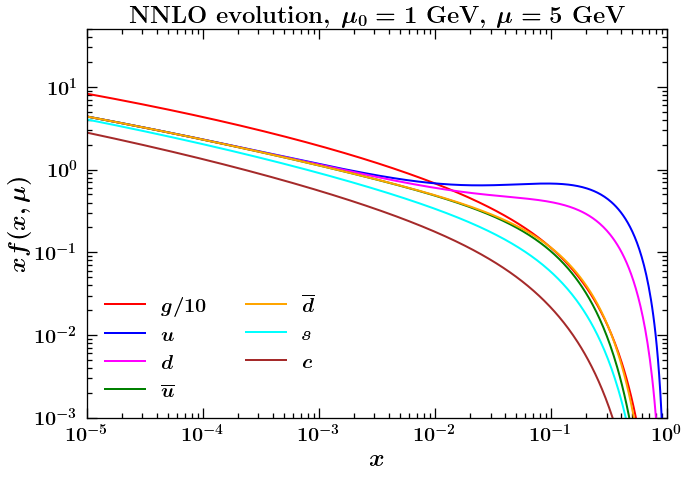

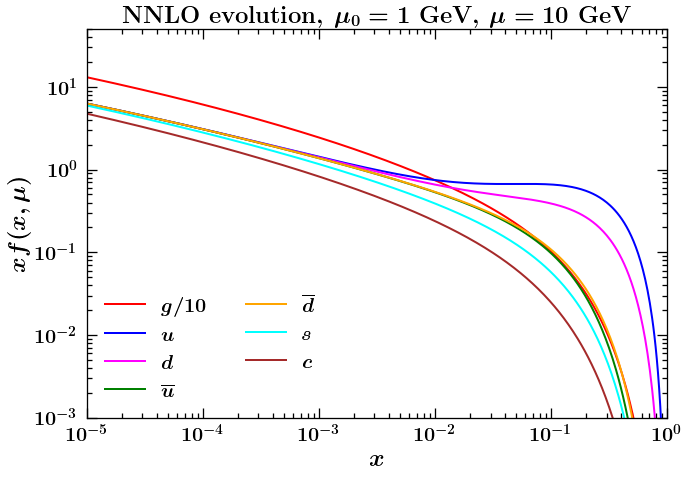

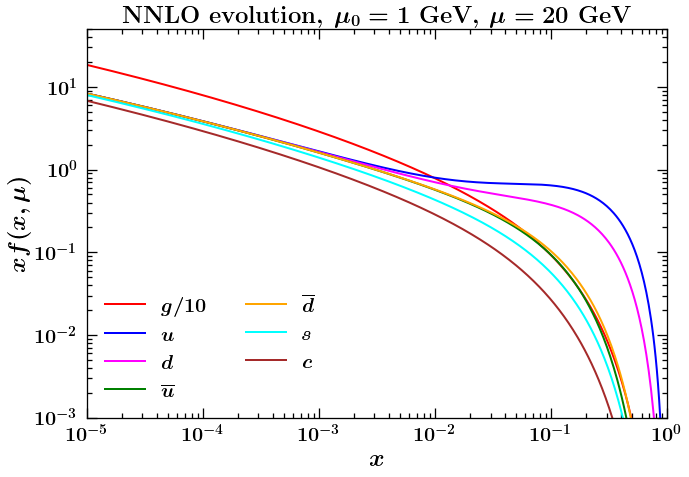

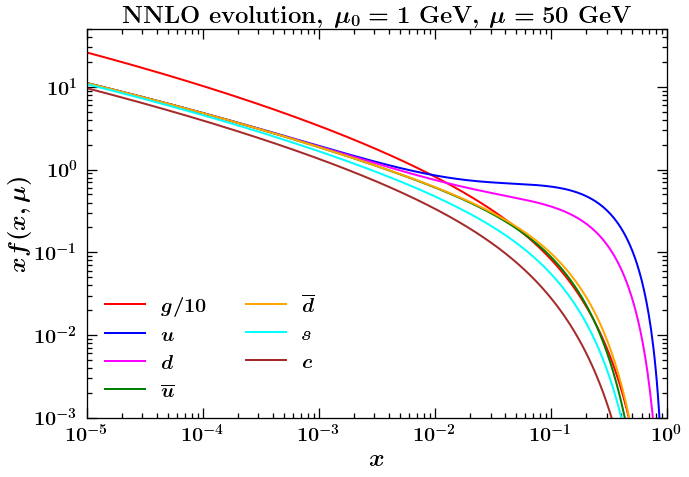

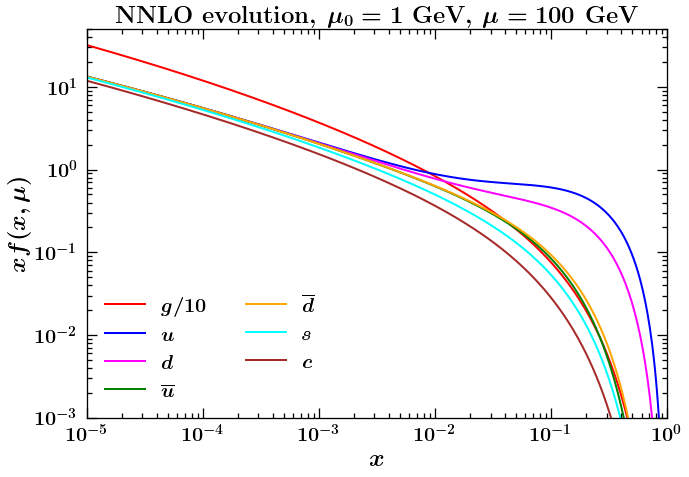

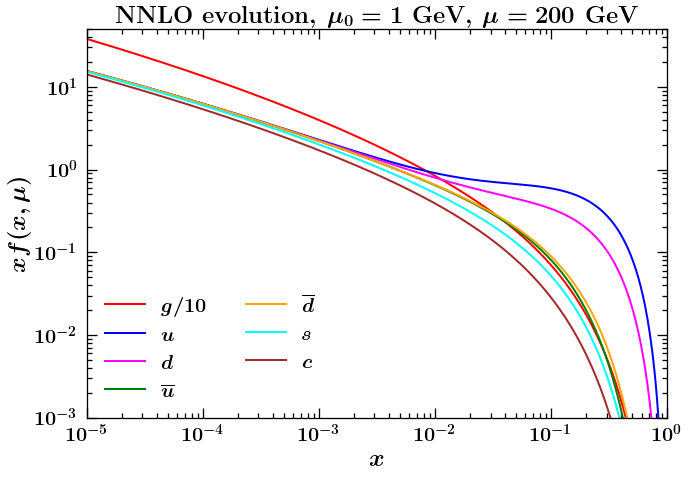

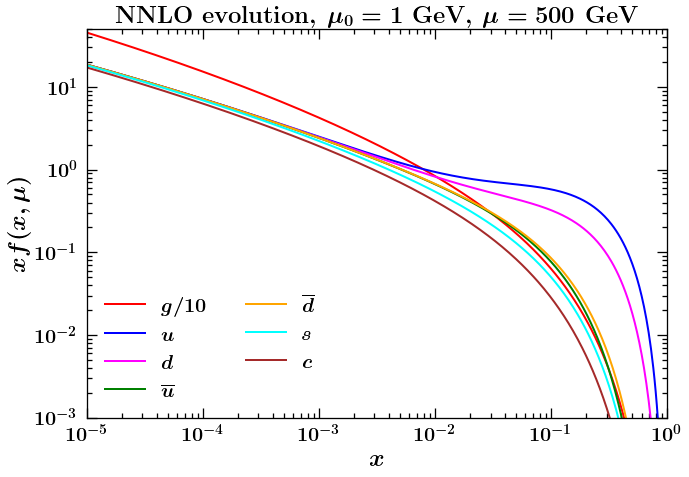

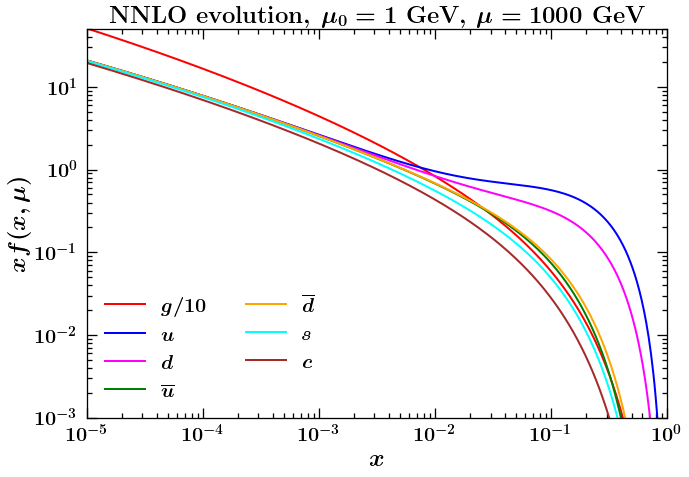

In [27]:
# Grids in x and mu
xg  = np.logspace(-5, 0, 500)
mug = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
colours = [r"red", r"blue", r"magenta", r"green", r"orange", r"cyan", r"brown", r"violet"]
labels = [r"$g/10$", r"$u$", r"$d$", r"$\overline{u}$", r"$\overline{d}$", r"$s$", r"$c$"]

for mu in mug:
    # Compute results
    tpdfs = ap.utilities.QCDEvToPhys(TabulatedPDFs.Evaluate(mu).GetObjects())
    xf = []
    xf.append([tpdfs[0].Evaluate(x) / 10 for x in xg])
    xf.append([tpdfs[2].Evaluate(x) for x in xg])
    xf.append([tpdfs[1].Evaluate(x) for x in xg])
    xf.append([tpdfs[-2].Evaluate(x) for x in xg])
    xf.append([tpdfs[-1].Evaluate(x) for x in xg])
    xf.append([tpdfs[3].Evaluate(x) for x in xg])
    xf.append([tpdfs[4].Evaluate(x) for x in xg])
    
    # Plot results
    plt.xscale("log")
    plt.yscale("log")
    plt.title(r"\textbf{NNLO evolution, $\mu_0=1$ GeV, $\mu =" + str(mu) + "$ GeV}")
    plt.ylabel(r"\textbf{$xf(x,\mu)$}")
    plt.xlabel(r"\textbf{$x$}")
    plt.xlim(0.00001, 1)
    plt.ylim(0.001, 50)
    j = 0
    for xp in xf:
        plt.plot(xg, xp, linewidth = 2, color = colours[j], label = labels[j])
        j += 1
    plt.legend(ncol = 2, fontsize = 20, loc = "lower left")
    plt.savefig("xf_mu" + str(mu) + ".pdf")
    plt.show()
    plt.close()